In [1]:
import numpy as np
import torch
from torch.autograd import Variable
import pdb
import matplotlib.pyplot as plt
%matplotlib inline

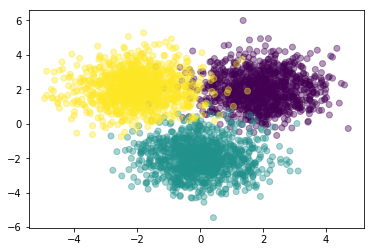

In [2]:
D,K = 2,3
N = int(K*1e3)

X0 = torch.randn(N//K, D) + torch.Tensor([2,2])
X1 = torch.randn(N//K, D) + torch.Tensor([0,-2])
X2 = torch.randn(N//K, D) + torch.Tensor([-2,2])
X = Variable( torch.cat((X0,X1,X2), 0), requires_grad=True )

y = np.array([0]*(N//K) + [1]*(N//K) + [2]*(N//K))
Y = np.zeros((N,K))
for i in range(N):
    Y[i,y[i]] = 1
    
y = Variable( torch.from_numpy(y), requires_grad=False).long()
Y = Variable( torch.from_numpy(Y), requires_grad=False)

plt.scatter(X.detach().numpy()[:,0], X.detach().numpy()[:,1], c=y.detach().numpy(), alpha=.4)

In [6]:
model = torch.nn.Sequential(
    torch.nn.Linear(D,8,bias=True),
    torch.nn.ReLU(),
    torch.nn.Linear(8,3,bias=True)
)

loss_fn = torch.nn.CrossEntropyLoss()

# optimizer = torch.optim.SGD(
#     model.parameters(),
#     lr=1e-1  
# )

optimizer = torch.optim.RMSprop(
    model.parameters(),
    lr = 1e-1
)

In [7]:
epochs = 1000
Loss = np.zeros(epochs)

for epoch in range(epochs):
    
    H = model(X)
    
#     eH = torch.exp(H)
#     Phat = eH / eH.sum(dim=1, keepdim=True)
    
    loss = loss_fn(H,y)
    Loss[epoch] = loss.item()
    
    optimizer.zero_grad()
    loss.backward()
    
    optimizer.step()

torch.Size([3000, 3])
0.9726666666666667


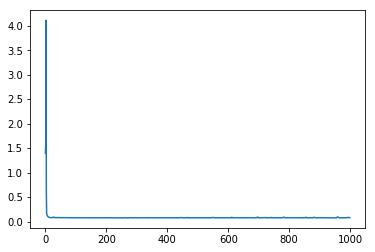

In [10]:
print(H.shape)
H1 = H.detach().numpy()

eH = np.exp(H1)
Phat = eH / eH.sum(axis=1, keepdims=True)

y1 = y.detach().numpy()
phat = Phat.argmax(axis=1)
print(np.mean(phat == y1) )


plt.plot(Loss)